In [137]:
from matplotlib import pyplot as plt
import numpy as np
from pfbmod import forward_pfb as pfb
from scipy.interpolate import CubicSpline


In [37]:
def get_samples(delay,N=500000,k=25000,dk=50000,plot=False):
    np.random.seed(42)
    x=np.random.randn(N)
    f=np.fft.fft(x)
    f[k+dk//2:]=0
    f[:k-dk//2]=0

    x_new=np.fft.ifft(f)

    f2=f.copy()
    f2=f2*np.exp(-2J*np.pi*np.arange(0,N)*delay/N)
    x2_new = np.fft.ifft(f2)

#     x2_new = x_new * np.exp(-2J*np.pi*k*delay/N)
    
#     print("phase =", 2*np.pi*k*delay/N)
    x_new = x_new+0.01*np.random.randn(N)
    x2_new = x2_new+0.01*np.random.randn(N)
    
    if plot:
        plt.plot(np.abs(np.fft.fft(x2_new)))
    return x_new, x2_new

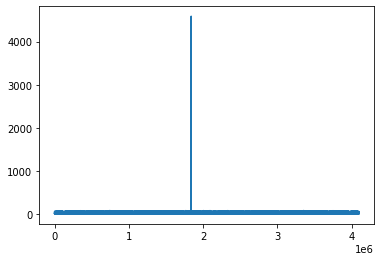

In [116]:
x1,x2=get_samples(500000,N=4096*1000,k=1839000,dk=400,plot=True)
x1=np.real(x1)
x2=np.real(x2)

In [117]:
yy=x1.reshape(-1,4096)
yy2=x2.reshape(-1,4096)
f1=np.fft.rfft(yy,axis=1)
f2=np.fft.rfft(yy2,axis=1)
# f1=pfb(x1,nchan=2048)
# f2=pfb(x2,nchan=2048)

Text(0.5, 0, 'channels')

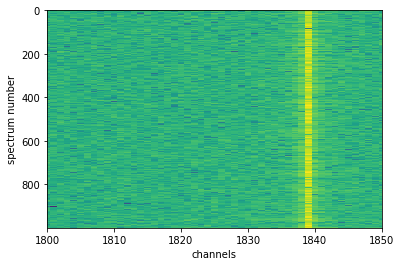

In [118]:
plt.imshow(np.log10(np.abs(f1)),interpolation='none',aspect='auto')#,cmap=palettable.colorbrewer.diverging.PuOr_8.mpl_colormap)
plt.xlim(1800,1850)
plt.ylabel('spectrum number')

plt.xlabel('channels')

In [119]:
a=np.zeros(2*len(x1),dtype=x1.dtype)
a2=np.zeros(2*len(x2),dtype=x1.dtype)
a[:len(x1)]=x1.copy()
a2[:len(x2)]=x2.copy()
xcorrtime1=np.fft.irfft(np.fft.rfft(a)*np.conj(np.fft.rfft(a2)))

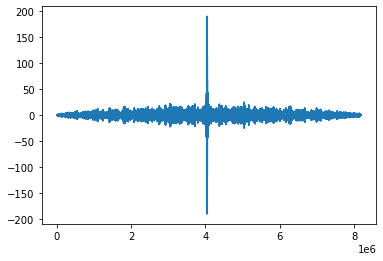

In [100]:
plt.plot(np.fft.fftshift(xcorrtime1))

In [120]:
Nsmall=f1.shape[0]
print(Nsmall)
# chans=np.hstack([np.linspace(1835-4,1835),np.linspace(1845-4,1845+5)]).astype(int)
chans=[1839]

# chans=np.arange(7337,7345).astype(int)
xcorrtime2=np.zeros((2*Nsmall,len(chans)),dtype='complex128')
for i,chan in enumerate(chans):
    p0=np.zeros(2*Nsmall,dtype=f1.dtype)
    p1=np.zeros(2*Nsmall,dtype=f2.dtype)
    p0[:Nsmall]=f1[:Nsmall,chan].flatten()
    p1[:Nsmall]=f2[:Nsmall,chan].flatten()
    ft1=np.fft.fft(p0)
    ft2=np.fft.fft(p1)
    xcorr=ft1*np.conj(ft2)
    xcorrtime2[:,i]=np.fft.ifft(xcorr)

1000


In [123]:
xcorr2sum = np.sum(xcorrtime2,axis=1)
amp=np.sum(np.real(xcorr2sum)*xcorrtime1[::4096])/np.sum(np.real(xcorr2sum)**2)

Text(0.5, 0, 'spectrum number')

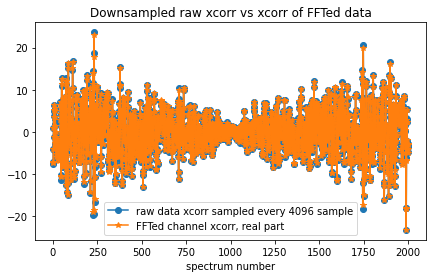

In [103]:
f=plt.gcf()
f.set_size_inches(7,4)

plt.plot(xcorrtime1[::4096],'-o',label='raw data xcorr sampled every 4096 sample')
plt.plot(amp*np.real(xcorr2sum),'-*',label='FFTed channel xcorr, real part')
plt.legend()
plt.title('Downsampled raw xcorr vs xcorr of FFTed data')
plt.xlabel('spectrum number')
# plt.xlim(0,100)

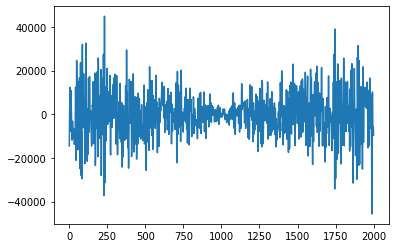

In [121]:
plt.plot(np.real(xcorr2sum))

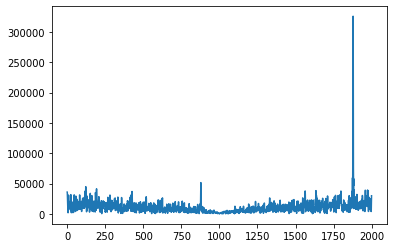

In [125]:
plt.plot(np.abs(xcorr2sum))
# plt.xlim(2000-15,2000)

In [112]:
50000/4096

12.20703125

Text(0.5, 1.0, 'unwrapped')

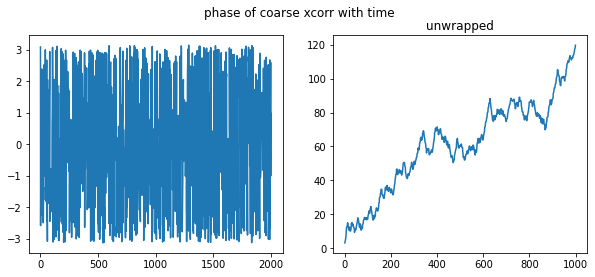

In [126]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.suptitle('phase of coarse xcorr with time')
plt.subplot(121)
plt.plot(np.angle(xcorr2sum),'-')
# plt.xlim(0,10)
plt.subplot(122)
plt.plot(np.unwrap(np.angle(xcorr2sum))[:1000],'-')
plt.title('unwrapped')

In [134]:
ph=np.unwrap(np.angle(xcorr2sum))[:1000].copy()
m,c=np.polyfit(np.arange(len(ph)),ph,1)

In [135]:
m

0.0868360334156815

In [138]:
y=np.unwrap(np.angle(xcorrtime2[:,0]))
m,c=np.polyfit(np.arange(0,len(y))*4096,y,1)
print(m*4096/(2*np.pi))
x=np.arange(0,xcorrtime2.shape[0]*4096)
newphase=(m+2*np.pi*1839/4096)*x+c#-2*np.pi*1150*60
cs=CubicSpline(np.arange(0,xcorrtime2.shape[0])*4096,np.abs(xcorrtime2[:,0]))
newmag=cs(x)
# newmag = np.interp(x,np.arange(0,len(y))*4096,np.abs(c1full))
zz1=newmag*np.exp(1J*newphase)

0.001291464947991957


7692067


(7592067.0, 7792067.0)

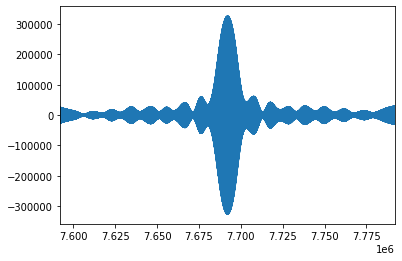

In [148]:
agmax2=np.argmax(np.real(zz1))
print(agmax2)
plt.plot(np.real(zz1))
plt.xlim(agmax2-100000,agmax2+100000)


In [150]:
len(zz1)-500000

7692000

In [151]:
np.angle(zz1)[7692000]

-0.49596056202518596

In [142]:
agmax=np.argmax(xcorrtime1)
agmax

7691951

(7591951.0, 7791951.0)

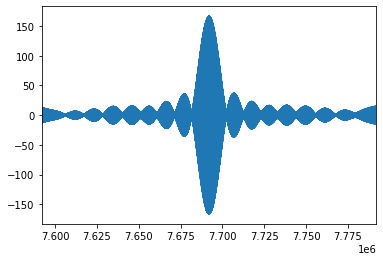

In [147]:
plt.plot(xcorrtime1)
plt.xlim(agmax-100000,agmax+100000)